From https://diffusion.csail.mit.edu/


In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def phi_t(x_0, t, theta):
    return np.exp( -theta * t) * x_0

In [25]:
t = np.linspace(0, 20, 40)
x_0 = np.linspace(-10, 10, 10)
theta = 0.25
x_t = np.array([phi_t(x, t, theta) for x in x_0])


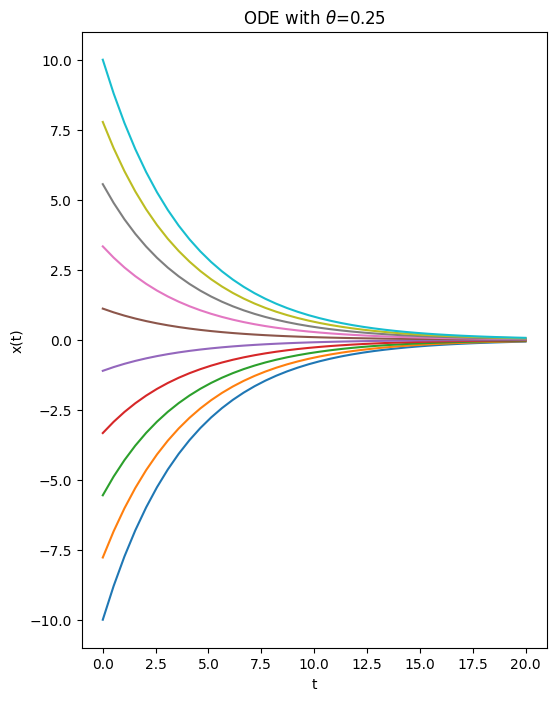

In [30]:
plt.figure(figsize=(6, 8))
for x in x_t:
    plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(f'ODE with $\\theta$={theta}')
plt.show()